In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,Q1S,Q1A,Q1E,Q1I,Q2S,Q2A,Q2E,Q2I,Q3S,Q3A,...,Q32I,age,gender,engnat,country,introelapse,testelapse,surveyelapse,screenw,screenh
0,3,A0A2A1,6861,17,4,A1A2A3A4,6419,23,5,A4A0A2A1A3,...,20,22,2,1,US,73,330,10,320,568
1,1,A9A2A0A3A6,7632,3,1,A3A6A1A5A2,18719,22,5,A4A2A0A3A1,...,7,17,1,2,CA,177,531,9,1920,1080
2,5,A2A4A1A3A0,12243,27,2,A3A0,8547,12,5,A2A4A0A1A3,...,3,37,1,1,US,30,425,9,1680,1050
3,3,A3A4A6A0A1,6894,20,5,A0A2A4A1A3,24992,1,5,A1A3A0A4A2,...,7,17,1,2,HR,8835,99070,9,360,640
4,0,A8A1,16436,11,2,A1A3,8463,3,3,A2A1A4,...,14,20,1,1,US,5,478,7,2560,1440


In [3]:
max_score = 5 * 32
score_students_columns = df.filter(regex='S$', axis=1)
final_score = score_students_columns.sum(axis=1)
grades = (final_score/max_score)*10
df['grade'] = grades
print(df.grade)

0        5.4375
1        3.3750
2        8.0625
3        9.0000
4        6.5000
          ...  
19213    6.7500
19214    4.2500
19215    6.1250
19216    6.3750
19217    4.2500
Name: grade, Length: 19218, dtype: float64


In [4]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        df[['Q15S','Q25S','Q16S','Q19S','Q22S','Q23S','Q1S','Q9S','Q11S','Q27S']],
                                        df['grade'],
                                        random_state = 123
                                    )
print( df[['Q15S','Q25S','Q16S','Q19S','Q22S']].columns)

Index(['Q15S', 'Q25S', 'Q16S', 'Q19S', 'Q22S'], dtype='object')


In [5]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth = 4,
            random_state = 123
          )

In [6]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=123)

Profundidad del árbol: 4
Número de nodos terminales: 16


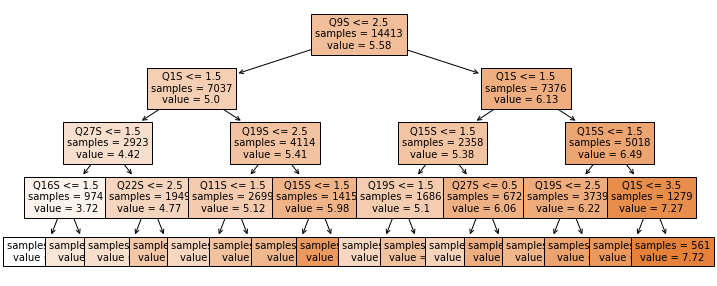

In [7]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df[['Q15S','Q25S','Q16S','Q19S','Q22S','Q23S','Q1S','Q9S','Q11S','Q27S']].columns,
            class_names   = 'grade',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [8]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(df[['Q15S','Q25S','Q16S','Q19S','Q22S','Q23S','Q1S','Q9S','Q11S','Q27S']].columns)
               )
print(texto_modelo)

|--- Q9S <= 2.50
|   |--- Q1S <= 1.50
|   |   |--- Q27S <= 1.50
|   |   |   |--- Q16S <= 1.50
|   |   |   |   |--- value: [3.31]
|   |   |   |--- Q16S >  1.50
|   |   |   |   |--- value: [4.20]
|   |   |--- Q27S >  1.50
|   |   |   |--- Q22S <= 2.50
|   |   |   |   |--- value: [4.48]
|   |   |   |--- Q22S >  2.50
|   |   |   |   |--- value: [5.28]
|   |--- Q1S >  1.50
|   |   |--- Q19S <= 2.50
|   |   |   |--- Q11S <= 1.50
|   |   |   |   |--- value: [4.72]
|   |   |   |--- Q11S >  1.50
|   |   |   |   |--- value: [5.45]
|   |   |--- Q19S >  2.50
|   |   |   |--- Q15S <= 1.50
|   |   |   |   |--- value: [5.80]
|   |   |   |--- Q15S >  1.50
|   |   |   |   |--- value: [6.87]
|--- Q9S >  2.50
|   |--- Q1S <= 1.50
|   |   |--- Q15S <= 1.50
|   |   |   |--- Q19S <= 1.50
|   |   |   |   |--- value: [4.70]
|   |   |   |--- Q19S >  1.50
|   |   |   |   |--- value: [5.46]
|   |   |--- Q15S >  1.50
|   |   |   |--- Q27S <= 0.50
|   |   |   |   |--- value: [4.80]
|   |   |   |--- Q27S >  0.50
| 

In [9]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df[['Q15S','Q25S','Q16S','Q19S','Q22S','Q23S','Q1S','Q9S','Q11S','Q27S']].columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,Q9S,0.346912
6,Q1S,0.290878
0,Q15S,0.130453
3,Q19S,0.108135
9,Q27S,0.060103
8,Q11S,0.027177
4,Q22S,0.022034
2,Q16S,0.014307
1,Q25S,0.000000
5,Q23S,0.000000


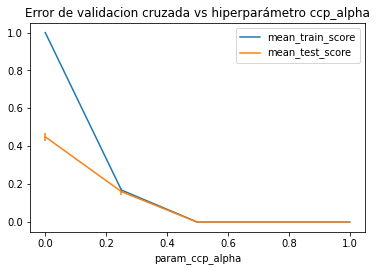

In [10]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 1, 5)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [11]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
print(grid.best_params_)

{'ccp_alpha': 0.0}


In [12]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 31
Número de nodos terminales: 13573


In [13]:
path = modelo_final.cost_complexity_pruning_path(X_train, y_train)
print(len(path.ccp_alphas))
ccp_alphas, impurities = path.ccp_alphas[11271:11571], path.impurities[11271:11571]
print(len(ccp_alphas))

11571
300


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

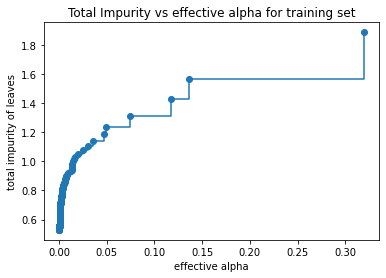

In [14]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3194503726460183


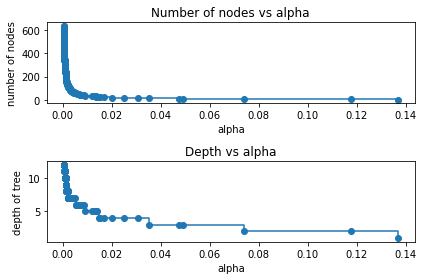

In [16]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

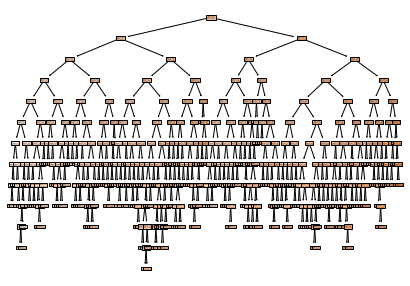

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = clfs[40],
            feature_names = df[['Q15S','Q25S','Q16S','Q19S','Q22S','Q23S','Q1S','Q9S','Q11S','Q27S']].columns,
            class_names   = 'grade',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [19]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.9837255290180899


In [20]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.0243935765277346


In [21]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = clfs[40].predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.8494723735656927


In [22]:
print(modelo_final.score(X_test, y_test))
print(clfs[40].score(X_test, y_test))

0.43337171585378786
0.6103604125562487
